#Homework 1 Part 1
Toby Chappell

#### Q1 Assumptions of Linear regresssion (2 points)

a. Create 4 synthetic datasets with two dimensions (x, y), each violating an assumptions of linear regression. Create a plot for each of the datasets. In a comment, explain how you created that dataset to violate each assumption and whether it also violates any other assumptions.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

Plot 1) Violates assumption that is there exists a linear and additive relationship between x and y. The dataset was created by generating random floats for both x and y. 

Text(0, 0.5, 'y')

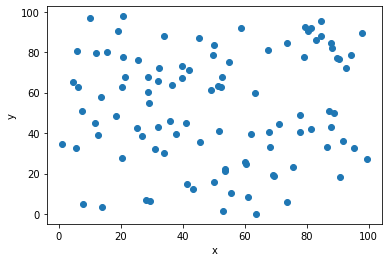

In [ ]:
x=np.random.rand(100)*100
y=np.random.rand(100)*100
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Plot 2) Violates assumption that there exists statistical independence between the residuals. The plot is created by increasing the standard deviation by 10 for every y (residuals become larger as y increases). This also violates assumption that the variance in the residuals is constant.

Text(0, 0.5, 'y')

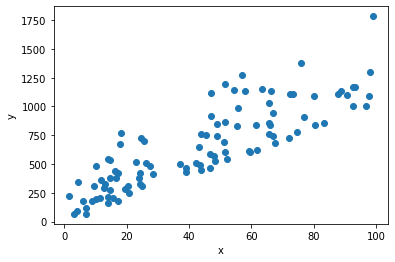

In [ ]:
x=np.random.rand(100)*100
y=np.zeros(100)
std_dev = 1
for i in range(y.size):
  y[i]=x[i]*10+np.random.rand()*std_dev
  std_dev = std_dev+10
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Plot 3) Violates assumption that there is constant variance in the residuals. The plot was created by generating two different linear realtionships that differ in standard deviation (x from 0 to 50 has a standard deviation of 25 and x from 50 to 100 has a standard deviation of 100). As such this also violates the assumption that the residuals are indpendent of y value.

Text(0, 0.5, 'y')

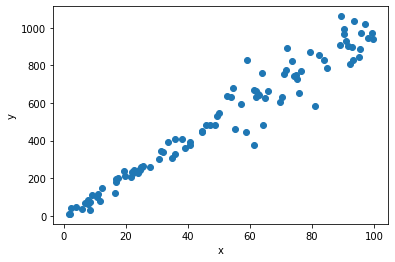

In [ ]:
x1=np.random.rand(50)*50
y1=x1*10+np.random.randn(50)*25
x2=np.random.rand(50)*50+50
y2=x2*10+np.random.randn(50)*100
x=np.append(x1,x2)
y=np.append(y1,y2)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Plot 4) Violates assumption that the residuals are normally distributed. The plot was created by randomly generating numbers following a gamma distribution on the y-axis.

Text(0, 0.5, 'y')

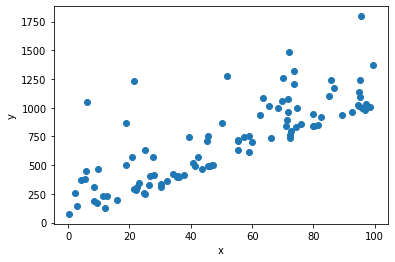

In [ ]:
x=np.random.rand(100)*100
y=x*10+np.random.gamma(1,10,100)*25
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

#### Q2 Multiple Linear Regression (4 points)
a. Read in train.csv, remove all outliers and missing values.

In [ ]:
df = pd.read_csv("train.csv")
df = df.dropna() #remove missing values
train = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] #keep all rows with z scores less than 3

b. Fit a single linear regression model using variable 'citric acid' on 'quality' using the Statsmodel package, print the summary of the regression model.

In [ ]:
X1 = train['citric acid']
X = sm.add_constant(X1)
y = train['quality']
s_linear = sm.OLS(y,X).fit()
s_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     56.01
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.50e-13
Time:                        19:37:57   Log-Likelihood:                -1269.8
No. Observations:                1075   AIC:                             2544.
Df Residuals:                    1073   BIC:                             2553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3853      0.041    130.797      0.000       5.305       5.466
citric acid     0.9395      0.126      7.484      0.000       0.693       1.186
==============================================================================
Omnibus:                        8.594   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.529
Skew:                           0.208   Prob(JB):                       0.0141
Kurtosis:                       3.130   Cond. No.                         5.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c. Fit a single linear regression model using variable 'sulphates' on 'quality' (y) using the Statsmodel package, print the summary of the regression model.

In [ ]:
X1 = train['sulphates']
X = sm.add_constant(X1)
y = train['quality']
s_linear = sm.OLS(y,X).fit()
s_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           5.72e-25
Time:                        19:38:01   Log-Likelihood:                -1243.7
No. Observations:                1075   AIC:                             2491.
Df Residuals:                    1073   BIC:                             2501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5311      0.107     42.371      0.000       4.321       4.741
sulphates      1.7004      0.161     10.584      0.000       1.385       2.016
==============================================================================
Omnibus:                        8.699   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.622
Skew:                           0.113   Prob(JB):                      0.00494
Kurtosis:                       3.432   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Fit a multiple linear regression model using 'citric acid' and 'sulphates' together on 'quality' using the Statsmodel package, print the summary of the regression model.

In [ ]:
X1 = train[['citric acid','sulphates']]
X = sm.add_constant(X1)
y = train['quality']
m_linear = sm.OLS(y,X).fit()
m_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     70.07
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.51e-29
Time:                        18:03:45   Log-Likelihood:                -1231.1
No. Observations:                1075   AIC:                             2468.
Df Residuals:                    1072   BIC:                             2483.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5079      0.106     42.593      0.000       4.300       4.716
citric acid     0.6360      0.126      5.055      0.000       0.389       0.883
sulphates       1.4756      0.165      8.945      0.000       1.152       1.799
==============================================================================
Omnibus:                        5.181   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.480
Skew:                           0.108   Prob(JB):                       0.0646
Kurtosis:                       3.275   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. Compare the goodness of fit of the three models you have from b, c, and d. Which one do you think is a better fit for the data you have? Explain your answer using the R<sup>2</sup>, adj-R<sup>2</sup>, AIC, and BIC, as necessarry.

Based on the R<sup>2</sup> value, model c (R<sup>2</sup> = 0.095) performs better than model b (R<sup>2</sup> = 0.050). However, using R<sup>2</sup> as a comparison with d is invalid since the multilinear regression is using more variables than b and c. Therefore we can use the adj-R<sup>2</sup>, AIC, and BIC, all of which perform better for the model d (model d has the largest adj-R<sup>2</sup> = 0.114, the smallest AIC = 2468, and the smallest BIC = 2483).